# DATA Analysis

The purpose of this Notebook is to perform the data Analysis, that is comparing the outputs generated from the previous notebooks for all the different samples. 



### Packages installation (since Aug 2021)

In [1]:
#pip install -U wxPython

### Libraries

In [2]:

import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import re
from itertools import cycle
import wx



#%matplotlib notebook

# 1. Data import and merging 

## 1.1 XP-Ramp

In [3]:
spl = 'ASW'

In [4]:
XP_Ramp_df = pd.read_csv('D:\DATA-Processing\PAC\XP_list_test.csv')
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

In [5]:
XP_Ramp_df_I.head(5)

,Sample,20K,25K,30K,40K,50K,55K,60K,65K,70K,...,137K,138K,140K,142K,145K,150K,155K,160K,180K,200K
Date,,,,,,,,,,,,,,,,,,,,,
2020_09_15,ASW,[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,[3],NaN,NaN,[4],NaN,NaN,NaN,NaN
2020_09_16,ASW,"[1, 2]",NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28, 29]","[30, 31]"
2020_09_17,ASW,"[1, 2]",NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN
2020_09_21,ASW,"[1, 2]",NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN
2020_09_28,ASW,"[1, 2]",NaN,"[3, 4, 5, 6]","[7, 8, 9, 10]","[11, 12, 13, 14]",NaN,"[15, 16, 17, 18]",NaN,"[19, 20, 21, 22]",...,NaN,NaN,"[59, 60, 61, 62]",NaN,"[63, 64, 65, 66]","[67, 68, 69, 70, 71, 72, 73, 74]","[75, 76, 77, 78]","[79, 80]",NaN,NaN


## 1.2  DR2 - DR3 all dates

 DR2 - DR3 are merged together

### 1.2.1 Import

In [15]:
# DR2

DR2_Allscans = glob('D:\DATA-Processing\PAC\XP_1-1/Samples/*/Data/DR/DR2_*_All-scans.csv')

# DR3

DR3_Allscans = glob("D:\DATA-Processing\PAC\XP_1-1/Samples/*\Data\DR\DR3_*_A.csv")

#### Sanity Check

In [16]:
DR2_Allscans

['D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_15\\Data\\DR\\DR2_2020_09_15_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_16\\Data\\DR\\DR2_2020_09_16_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_17\\Data\\DR\\DR2_2020_09_17_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_21\\Data\\DR\\DR2_2020_09_21_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_28\\Data\\DR\\DR2_2020_09_28_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_10_14\\Data\\DR\\DR2_2020_10_14_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_10_22\\Data\\DR\\DR2_2020_10_22_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_11_16\\Data\\DR\\DR2_2020_11_16_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_11_19\\Data\\DR\\DR2_2020_11_19_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2021_05_13\\Data\\DR\\DR2_2021_05_13_All-scans.csv',
 'D:\\DATA-Processing\\PAC\\XP

In [17]:

DR3_Allscans

['D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_15\\Data\\DR\\DR3_2020_09_15_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_16\\Data\\DR\\DR3_2020_09_16_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_17\\Data\\DR\\DR3_2020_09_17_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_21\\Data\\DR\\DR3_2020_09_21_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_28\\Data\\DR\\DR3_2020_09_28_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_10_22\\Data\\DR\\DR3_2020_10_22_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_11_16\\Data\\DR\\DR3_2020_11_16_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_11_19\\Data\\DR\\DR3_2020_11_19_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2021_05_13\\Data\\DR\\DR3_2021_05_13_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2021_05_24\\Data\\DR\\DR3_2021_05_24_A.csv',
 'D:\\DATA-Processing\\PAC\\XP_1-1/Samples\\2021_07_13\\Data\\DR\\DR3_2021_07_13_A.csv']

### 1.2.2 Merging

#### DR2

In [18]:
All_data_frame = []

for items in DR2_Allscans:

    df = pd.read_csv(items)
    df_1 = df.T.iloc[1:].T
    
    All_data_frame.append(df_1) 
    
    del df
    del df_1
    
    DR2_Allscans_full = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)
    
    

In [21]:
#DR2_Allscans_full.to_csv('D:\DATA-Processing\PAC\DR2_full.csv')

In [19]:
DR2_Allscans_full


#DR2_Allscans = glob("D:\PhD-WS\Projects\PAC\XP_1-1\DATA\*\Data\DR\DR2*All-scans.csv")

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,799.8442,0.060549,0.076188,0.071446,0.047759,0.061813,0.062677,0.070377,0.071031,0.073033,...,0.093934,0.093203,0.092399,0.099772,0.096810,0.097544,0.100107,0.103579,0.104936,0.101043
1,800.3264,0.059965,0.074772,0.075044,0.037780,0.059208,0.059777,0.064277,0.064086,0.066281,...,0.083360,0.081969,0.082094,0.088924,0.087240,0.086223,0.089819,0.093463,0.093718,0.099738
2,800.8085,0.059358,0.071323,0.077309,0.027005,0.056651,0.057048,0.058439,0.057722,0.059902,...,0.072232,0.071203,0.071244,0.077594,0.076774,0.074845,0.079243,0.082596,0.082294,0.098120
3,801.2906,0.059458,0.067423,0.074469,0.028824,0.056841,0.057890,0.060087,0.059701,0.061729,...,0.070915,0.071538,0.070631,0.075896,0.075466,0.074291,0.078632,0.081942,0.081429,0.096272
4,801.7727,0.059095,0.065795,0.072036,0.031592,0.057564,0.059094,0.061732,0.062012,0.063394,...,0.075783,0.076050,0.075375,0.080245,0.080174,0.079724,0.083327,0.086687,0.086468,0.096067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14824,3998.2570,0.000151,0.000688,0.000876,0.000556,0.000884,0.000916,0.000533,0.000411,0.000489,...,0.001156,0.001089,0.001162,0.001180,0.001225,0.001234,0.001153,0.001119,0.001150,0.001113
14825,3998.7390,0.000183,0.000399,0.000554,0.000626,0.000476,0.000507,0.000442,0.000392,0.000458,...,0.001186,0.001108,0.001187,0.001181,0.001220,0.001265,0.001183,0.001146,0.001162,0.001189
14826,3999.2210,0.000101,0.000000,0.000000,0.000436,0.000000,0.000000,0.000000,0.000039,0.000088,...,0.001247,0.001184,0.001280,0.001206,0.001251,0.001322,0.001264,0.001229,0.001242,0.001314
14827,3999.7030,0.000105,0.000750,0.000746,0.000190,0.000703,0.000696,0.000560,0.000518,0.000532,...,0.000616,0.000588,0.000641,0.000596,0.000628,0.000660,0.000640,0.000611,0.000625,0.000614


In [20]:
DR2_Allscans_full

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,799.8442,0.060549,0.076188,0.071446,0.047759,0.061813,0.062677,0.070377,0.071031,0.073033,...,0.093934,0.093203,0.092399,0.099772,0.096810,0.097544,0.100107,0.103579,0.104936,0.101043
1,800.3264,0.059965,0.074772,0.075044,0.037780,0.059208,0.059777,0.064277,0.064086,0.066281,...,0.083360,0.081969,0.082094,0.088924,0.087240,0.086223,0.089819,0.093463,0.093718,0.099738
2,800.8085,0.059358,0.071323,0.077309,0.027005,0.056651,0.057048,0.058439,0.057722,0.059902,...,0.072232,0.071203,0.071244,0.077594,0.076774,0.074845,0.079243,0.082596,0.082294,0.098120
3,801.2906,0.059458,0.067423,0.074469,0.028824,0.056841,0.057890,0.060087,0.059701,0.061729,...,0.070915,0.071538,0.070631,0.075896,0.075466,0.074291,0.078632,0.081942,0.081429,0.096272
4,801.7727,0.059095,0.065795,0.072036,0.031592,0.057564,0.059094,0.061732,0.062012,0.063394,...,0.075783,0.076050,0.075375,0.080245,0.080174,0.079724,0.083327,0.086687,0.086468,0.096067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14824,3998.2570,0.000151,0.000688,0.000876,0.000556,0.000884,0.000916,0.000533,0.000411,0.000489,...,0.001156,0.001089,0.001162,0.001180,0.001225,0.001234,0.001153,0.001119,0.001150,0.001113
14825,3998.7390,0.000183,0.000399,0.000554,0.000626,0.000476,0.000507,0.000442,0.000392,0.000458,...,0.001186,0.001108,0.001187,0.001181,0.001220,0.001265,0.001183,0.001146,0.001162,0.001189
14826,3999.2210,0.000101,0.000000,0.000000,0.000436,0.000000,0.000000,0.000000,0.000039,0.000088,...,0.001247,0.001184,0.001280,0.001206,0.001251,0.001322,0.001264,0.001229,0.001242,0.001314
14827,3999.7030,0.000105,0.000750,0.000746,0.000190,0.000703,0.000696,0.000560,0.000518,0.000532,...,0.000616,0.000588,0.000641,0.000596,0.000628,0.000660,0.000640,0.000611,0.000625,0.000614


In [6]:
print(DR2_Allscans_full['Wavenumber'])

0         799.8442
1         800.3264
2         800.8085
3         801.2906
4         801.7727
           ...    
14824    3998.2570
14825    3998.7390
14826    3999.2210
14827    3999.7030
14828    4000.1850
Name: Wavenumber, Length: 14829, dtype: float64


$\color{red}{\text{Problem with Row number (should be 6639)!}}$


#### DR3

In [10]:
All_data_frame = []

#Wavenumber = 

for items in DR3_Allscans:

    df = pd.read_csv(items)
    df_1 = df.T.iloc[1:].T

    
    All_data_frame.append(df_1) 
    
    DR3_Allscans_full = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)

In [11]:
DR3_Allscans_full

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,2800.178,-0.000187,0.000075,0.000050,9.007620e-19,-0.000259,-0.000271,-0.000180,-0.000149,-0.000381,...,0.000134,0.000101,0.000235,0.000275,0.000239,0.000220,0.000243,0.000233,0.000244,0.001587
1,2800.660,-0.000137,0.000142,0.000364,3.145895e-04,-0.000121,-0.000137,0.000113,0.000146,-0.000087,...,0.000020,-0.000026,0.000106,0.000145,0.000109,0.000093,0.000105,0.000098,0.000109,0.001548
2,2801.142,-0.000201,-0.000020,0.000000,9.304404e-05,-0.000172,-0.000191,-0.000143,-0.000134,-0.000362,...,0.000304,0.000252,0.000380,0.000414,0.000382,0.000361,0.000364,0.000374,0.000384,0.001655
3,2801.624,-0.000130,0.000175,0.000488,4.249901e-04,-0.000048,-0.000069,0.000192,0.000211,-0.000008,...,0.000201,0.000159,0.000272,0.000309,0.000273,0.000247,0.000250,0.000267,0.000272,0.001589
4,2802.106,-0.000186,0.000049,0.000172,2.575800e-04,-0.000066,-0.000087,-0.000006,-0.000010,-0.000224,...,0.000465,0.000433,0.000532,0.000573,0.000525,0.000505,0.000505,0.000521,0.000534,0.001676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,3998.257,0.000156,0.000714,0.000909,5.772753e-04,0.000921,0.000955,0.000556,0.000428,0.000510,...,0.001123,0.001057,0.001128,0.001146,0.001190,0.001198,0.001120,0.001087,0.001117,0.001081
2486,3998.739,0.000190,0.000414,0.000575,6.505353e-04,0.000497,0.000529,0.000461,0.000409,0.000478,...,0.001152,0.001075,0.001153,0.001147,0.001184,0.001228,0.001149,0.001113,0.001129,0.001154
2487,3999.221,0.000105,0.000000,0.000000,4.531809e-04,0.000000,0.000000,0.000000,0.000040,0.000092,...,0.001211,0.001150,0.001243,0.001171,0.001214,0.001283,0.001227,0.001193,0.001207,0.001276
2488,3999.703,0.000109,0.000779,0.000774,1.974239e-04,0.000733,0.000726,0.000584,0.000540,0.000554,...,0.000598,0.000571,0.000622,0.000579,0.000609,0.000641,0.000622,0.000593,0.000607,0.000596


Row number --> OK :) (2490)

## 1.3 Data_annex

In [12]:
data_anex = glob("D:\PhD-WS\Projects\PAC\XP_1-1\DATA\*\Data\DR\**_data_annex.csv")

### 1.2.2 Merging

# 2 Scans selection (Temperature - isotherms)

Using I python widget

[I python widget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

[Widgets layout](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html)

## 2.1 Parameter list

In [13]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()
Date = XP_Ramp_df_I.index.values.tolist()
Sample = XP_Ramp_df_I['Sample'].values.tolist()  

## 2.2 Widget selection

the purpose of the widget is to select the data we want to plot using widget
- create list

Document:

[I python widget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [14]:
#Create Dropdown Box Widget
wT = widgets.SelectMultiple(
    options= Temp,
    description='Temperature:',
    disabled=False,
)

wD = widgets.SelectMultiple(
    options= Date,
    description='Date',
    disabled=False,
)

wS = widgets.SelectMultiple(
    options= Sample,
    description='Sample',
    disabled=False,
)

widgets.HBox([wS,wD, wT])



#display(wT,wD,wS)

In [61]:
wT_L = list(wT.value)
wD_L = list(wD.value)

## Sanity Check

In [62]:
wT_L

['20K ', '60K', '100K']

In [63]:
wD_L

['2020_09_16', '2020_09_17', '2020_09_21']

## sample neme construction

use list value to extract scan number and produce file name

insert condition to supress first scan (ramp)

In [64]:
#date = ['2020_09_16','2020_09_17']
#temp = ['60K','80K']
#spl = 'ASW'

z = []
value_1 = []

for x in wD_L:
    for y in wT_L:

        value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == x, y].values[0]
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, x, items))
            z.append({
                
               'Name' : str(to_plot),
               'Temp' : y,
               'Date' : x, 
                
          
         
         })
             

In [65]:
z

[{'Name': 'ASW_2020_09_16_1', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_2', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_6', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_7', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_8', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_12', 'Temp': '100K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_13', 'Temp': '100K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_14', 'Temp': '100K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_17_1', 'Temp': '20K ', 'Date': '2020_09_17'},
 {'Name': 'ASW_2020_09_17_2', 'Temp': '20K ', 'Date': '2020_09_17'},
 {'Name': 'ASW_2020_09_17_6', 'Temp': '60K', 'Date': '2020_09_17'},
 {'Name': 'ASW_2020_09_17_7', 'Temp': '60K', 'Date': '2020_09_17'},
 {'Name': 'ASW_2020_09_17_8', 'Temp': '60K', 'Date': '2020_09_17'},
 {'Name': 'ASW_2020_09_17_12', 'Temp': '100K', 'Date': '2020_09_17'},
 {'Name': 'ASW_2020_09_17_13', 'Temp

In [66]:
dat= pd.DataFrame(z)
data_df = dat.set_index('Name')

In [67]:
data_df

,Temp,Date
Name,,
ASW_2020_09_16_1,20K,2020_09_16
ASW_2020_09_16_2,20K,2020_09_16
ASW_2020_09_16_6,60K,2020_09_16
ASW_2020_09_16_7,60K,2020_09_16
ASW_2020_09_16_8,60K,2020_09_16
ASW_2020_09_16_12,100K,2020_09_16
ASW_2020_09_16_13,100K,2020_09_16
ASW_2020_09_16_14,100K,2020_09_16
ASW_2020_09_17_1,20K,2020_09_17


## 1.1.4 Plot pre-formating

### Temperature

Find a way to have a specific c=cmjet when we want to plot long isotherm data.

In [68]:
def Temp_color(row):
    if row['Temp'] == '20K ':
        return int(1)
    if row['Temp'] == '30K ':
        return int(2) 
    elif row['Temp'] == '40K':
        return int(3)
    elif row['Temp'] == '50K':
        return int(4)
    elif row['Temp'] == '60K':
        return int(5)
    elif row['Temp'] == '70K':
        return int(6)
    elif row['Temp'] == '80K':
        return int(7)
    elif row['Temp'] == '90K':
        return int(8)
    elif row['Temp'] == '100K':
        return int(9)
    elif row['Temp'] == '110K':
        return int(10)
    elif row['Temp'] == '120K':
        return int(11)
    elif row['Temp'] == '125K':
        return int(12)
    elif row['Temp'] == '130K':
        return int(13)
    elif row['Temp'] == '132K':
        return int(14)
    elif row['Temp'] == '134K':
        return int(15)
    elif row['Temp'] == '135K':
        return int(16)
    elif row['Temp'] == '136K':
        return int(17)
    elif row['Temp'] == '137K':
        return int(18)
    elif row['Temp'] == '138K':
        return int(19)
    elif row['Temp'] == '140K':
        return int(20)
    elif row['Temp'] == '145K':
        return int(21)
    elif row['Temp'] == '150K':
        return int(21)
    elif row['Temp'] == '155K':
        return int(22)
    elif row['Temp'] == '160K':
        return int(23)
    elif row['Temp'] == '180K':
        return int(24)
    elif row['Temp'] == '200K':
        return int(25)

In [69]:
data_df['Colour'] = data_df.apply (lambda row: Temp_color(row), axis=1)

In [70]:
data_df

,Temp,Date,Colour
Name,,,
ASW_2020_09_16_1,20K,2020_09_16,1
ASW_2020_09_16_2,20K,2020_09_16,1
ASW_2020_09_16_6,60K,2020_09_16,5
ASW_2020_09_16_7,60K,2020_09_16,5
ASW_2020_09_16_8,60K,2020_09_16,5
ASW_2020_09_16_12,100K,2020_09_16,9
ASW_2020_09_16_13,100K,2020_09_16,9
ASW_2020_09_16_14,100K,2020_09_16,9
ASW_2020_09_17_1,20K,2020_09_17,1


### Dates

In [71]:
linestyle = ['-','_', ';' '--', '-.', ':']

6 sample max

In [72]:
for i, y in zip(wD_L, linestyle):
    
    print(i)
    print(y)

    data_df['linetsyle'] = (data_df['Date']==i, y)

2020_09_16
-


ValueError: Length of values does not match length of index

In [73]:
data_df

,Temp,Date,Colour
Name,,,
ASW_2020_09_16_1,20K,2020_09_16,1
ASW_2020_09_16_2,20K,2020_09_16,1
ASW_2020_09_16_6,60K,2020_09_16,5
ASW_2020_09_16_7,60K,2020_09_16,5
ASW_2020_09_16_8,60K,2020_09_16,5
ASW_2020_09_16_12,100K,2020_09_16,9
ASW_2020_09_16_13,100K,2020_09_16,9
ASW_2020_09_16_14,100K,2020_09_16,9
ASW_2020_09_17_1,20K,2020_09_17,1


[Cycler methodology](https://matplotlib.org/stable/tutorials/intermediate/color_cycle.html#sphx-glr-tutorials-intermediate-color-cycle-py)

For plotting

[Seaborn library](https://seaborn.pydata.org/)


### Could try Class attribute

What do we want to do:


Vocabulary:
- Method = function associated with a class
- Attributes = 

Class XP_Param is a blueprint to construct a list of sample that we want to plot based on the parameters enters with the widget.

One function should find within XP_Ramp_df_I the scan numbers associated with a peculiar date and temperature.
A second function should build a string with the format spl_date_scan number and append it into a list

differences between instance variables and class variables ?

# Plotting

Purpose here is to plot from DR2_all scan the scan present in dat using Temp and date in the legend and use the groupping for formatting

Find way to implement label with respect to dataframe value (input for color ?)

## 3 different DR

In [74]:
print(dat['Name'])

0      ASW_2020_09_16_1
1      ASW_2020_09_16_2
2      ASW_2020_09_16_6
3      ASW_2020_09_16_7
4      ASW_2020_09_16_8
5     ASW_2020_09_16_12
6     ASW_2020_09_16_13
7     ASW_2020_09_16_14
8      ASW_2020_09_17_1
9      ASW_2020_09_17_2
10     ASW_2020_09_17_6
11     ASW_2020_09_17_7
12     ASW_2020_09_17_8
13    ASW_2020_09_17_12
14    ASW_2020_09_17_13
15    ASW_2020_09_17_14
16     ASW_2020_09_21_1
17     ASW_2020_09_21_2
18     ASW_2020_09_21_6
19     ASW_2020_09_21_7
20     ASW_2020_09_21_8
21    ASW_2020_09_21_12
22    ASW_2020_09_21_13
23    ASW_2020_09_21_14
Name: Name, dtype: object


24


<IPython.core.display.Javascript object>


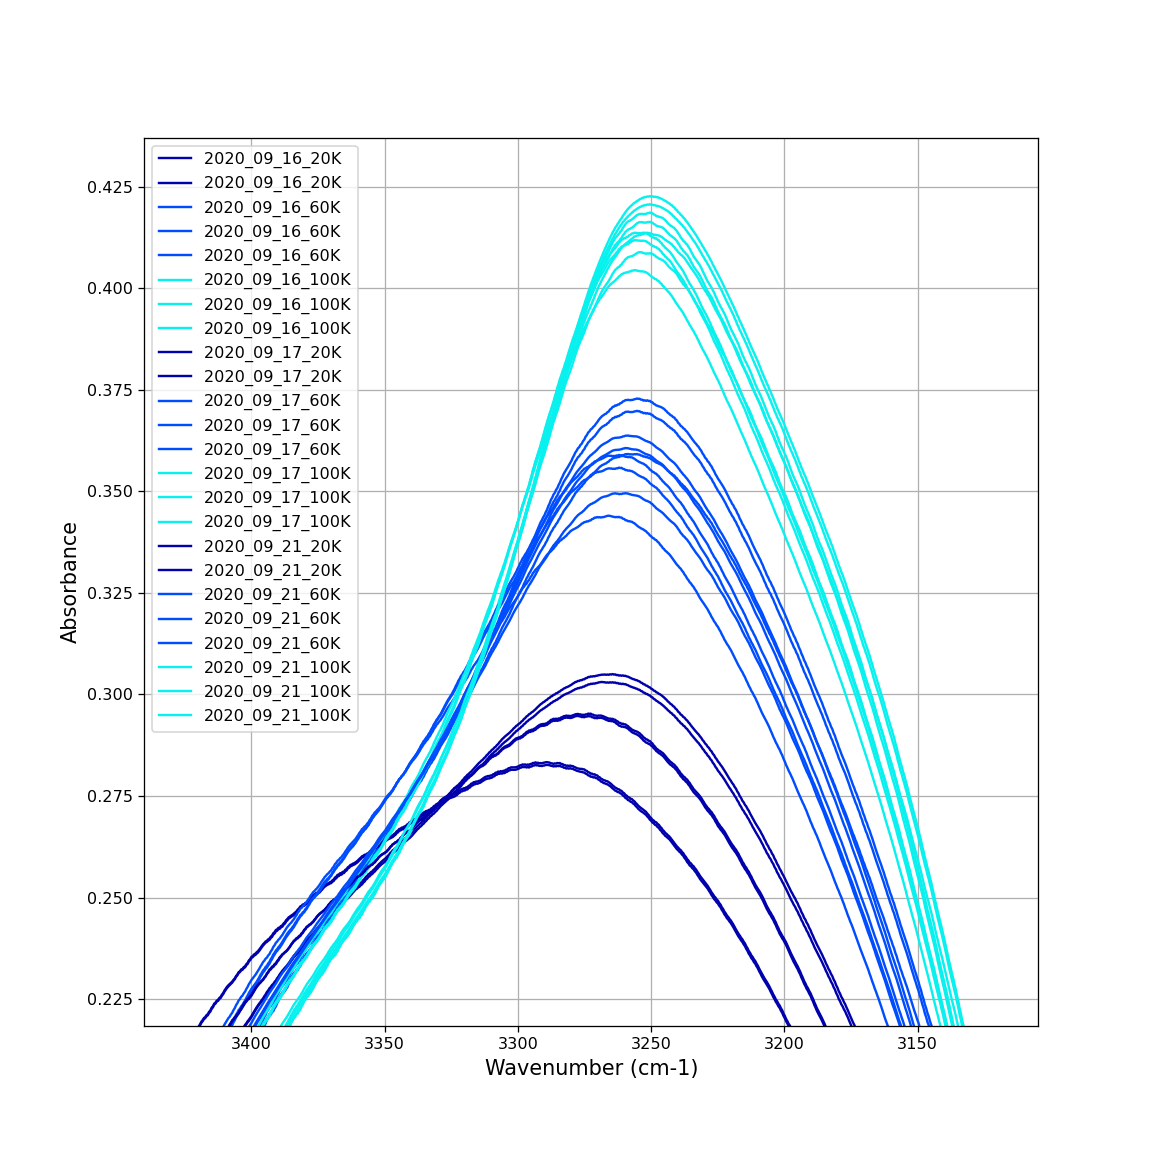

In [75]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(10,10))

#colors = sns.color_palette("coolwarm", data_df.Temp.nunique())
#ax.set_prop_cycle('color', colors)

#ax.set_prop_cycle(color =['b', 'g'])
#cc = (cycler(linestyle=['-', '--', '-.', ]))

for i in dat['Name']:
    
#DR2
    
    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

#`DR3

    x = DR3_Allscans_full.Wavenumber
    y = DR3_Allscans_full['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), c=cm.jet(int(data_df.loc[i]['Colour'])/25)) 


#plt.title('{0} DR1 '.format(date))
plt.axis([3800,2800,0,0.45])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

### Max Absorbance

Import code from DR

### Other plotting

In [ ]:
# imports
%matplotlib inline

from ipywidgets import interactive
import pandas as pd
import numpy as np
# from jupyterthemes import jtplot

# Sample data
np.random.seed(123)
rows = 50
dfx = pd.DataFrame(np.random.randint(90,110,size=(rows, 1)), columns=['Variable X'])
dfy = pd.DataFrame(np.random.randint(25,68,size=(rows, 1)), columns=['Variable Y'])
dfz = pd.DataFrame(np.random.randint(60,70,size=(rows, 1)), columns=['Variable Z'])

df = pd.concat([dfx,dfy,dfz], axis = 1)
#jtplot.style()

import ipywidgets as widgets
from IPython.display import display

def multiplot(a):
    opts = df.columns.values
    df.loc[:, a].plot()

interactive_plot = interactive(multiplot, a=['Variable X', 'Variable Y', 'Variable Z'])
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

## Create class with widget input as variable 

Embed Naming function

[Youtube tutorial on classes](https://www.youtube.com/watch?v=ZDa-Z5JzLYM)

In [ ]:
class XP_Param:
    
    def found(self):
        print("input is" + self.column + self.row )
        return XP_Ramp_df_I.loc[self.row,self.column]
    

    

In [ ]:
T1 = XP_Param()
T1.column = "60K"
T1.row = "2020_09_21"


In [ ]:
T1.found()

## Name the desired sample

Purpose here is to create a function that create sample name based on previously selected parameters (date / Temperature)

### Documentation

[Interact function](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#interactive)

In [ ]:
output_Date = wD.value

In [ ]:
# Define any function
def file_name(output_Date):
    return print(output_Date) 
    


### Plotting strategy

# Plotting

## Data from Data_Annex 

## Data from DR2

## Interactive Plotting

[I python widget list](https://kapernikov.com/ipywidgets-with-matplotlib/)



In [ ]:
x = numpy.linspace(0, 2 * numpy.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, numpy.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(numpy.sin(change.new * x))
    fig.canvas.draw()
     

int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

## wx GUI creation

In [ ]:
import wx

In [ ]:
# Création d'un nouveau cadre, dérivé du wxPython 'Frame'.
class TestFrame(wx.Frame):
    def __init__(self, parent, ID, title):
        wx.Frame.__init__(self, parent, -1, title, pos=(0, 0), size=(500, 200))

        # À l'intérieur du cadre, créer un panneau..
        panel = wx.Panel(self, -1)

        # Créer un texte dans le panneau
        texte = wx.StaticText(panel, -1, "Bonjour tout le monde!", wx.Point(10, 5), wx.Size(-1, -1))
                
        # Créer un bouton dans le panneau
        bouton = wx.Button(panel, -1, "Cliquez-moi!",  wx.Point(10, 35), wx.Size(-1, -1))
        # lier le bouton à une fonction:
        self.Bind(wx.EVT_BUTTON, self.creerDiag, bouton)
        
    # fonction qui affiche une boîte de dialogue
    def creerDiag(self, event):
        dlg = wx.MessageDialog(self, "Merci de m'avoir cliqué, ça fait du bien.",
          "Merci!", wx.ICON_EXCLAMATION | wx.YES_NO | wx.CANCEL)
        dlg.ShowModal()
        dlg.Destroy()
        

# Chaque application wxWidgets doit avoir une classe dérivée de wx.App
class TestApp(wx.App):
    def OnInit(self):
        frame = TestFrame(None, -1, "Test")
        self.SetTopWindow(frame)
        frame.Show(True)
        return True

if __name__ == '__main__':
    app = TestApp(0) # créer une nouvelle instance de l'application
    app.MainLoop()   # lancer l'application

In [ ]:
app = wx.App()

frame = wx.Frame(None, title='Simple application')
frame.Show()

app.MainLoop()

In [ ]:
#!/usr/bin/env python

"""
ZetCode wxPython tutorial

In this example, we create a submenu and a menu
separator.

author: Jan Bodnar
website: www.zetcode.com
last modified: July 2020
"""

import wx


class Example(wx.Frame):

    def __init__(self, *args, **kwargs):
        super(Example, self).__init__(*args, **kwargs)

        self.InitUI()

    def InitUI(self):

        menubar = wx.MenuBar()

        fileMenu = wx.Menu()
        fileMenu.Append(wx.ID_NEW, '&New')
        fileMenu.Append(wx.ID_OPEN, '&Open')
        fileMenu.Append(wx.ID_SAVE, '&Save')
        fileMenu.AppendSeparator()

        imp = wx.Menu()
        imp.Append(wx.ID_ANY, 'Import newsfeed list...')
        imp.Append(wx.ID_ANY, 'Import bookmarks...')
        imp.Append(wx.ID_ANY, 'Import mail...')

        fileMenu.AppendMenu(wx.ID_ANY, 'I&mport', imp)

        qmi = wx.MenuItem(fileMenu, wx.ID_EXIT, '&Quit\tCtrl+W')
        fileMenu.AppendItem(qmi)

        self.Bind(wx.EVT_MENU, self.OnQuit, qmi)

        menubar.Append(fileMenu, '&File')
        self.SetMenuBar(menubar)

        self.SetSize((900, 600))
        self.SetTitle('Data Analysis Plotting GUI')
        self.Centre()

    def OnQuit(self, e):
        self.Close()


def main():

    app = wx.App()
    ex = Example(None)
    ex.Show()
    app.MainLoop()


if __name__ == '__main__':
    main()

In [ ]:
#!/usr/bin/env python


"""
ZetCode wxPython tutorial

In this example we create a Go To class
layout with wx.BoxSizer.

author: Jan Bodnar
website: www.zetcode.com
last modified: July 2020
"""

import wx

class Example(wx.Frame):

    def __init__(self, parent, title):
        super(Example, self).__init__(parent, title=title)

        self.InitUI()
        self.Centre()

    def InitUI(self):

        panel = wx.Panel(self)

        font = wx.SystemSettings.GetFont(wx.SYS_SYSTEM_FONT)

        font.SetPointSize(9)

        vbox = wx.BoxSizer(wx.VERTICAL)

        hbox1 = wx.BoxSizer(wx.HORIZONTAL)
        st1 = wx.StaticText(panel, label='Class Name')
        st1.SetFont(font)
        hbox1.Add(st1, flag=wx.RIGHT, border=8)
        tc = wx.TextCtrl(panel)
        hbox1.Add(tc, proportion=1)
        vbox.Add(hbox1, flag=wx.EXPAND|wx.LEFT|wx.RIGHT|wx.TOP, border=10)

        vbox.Add((-1, 10))

        hbox2 = wx.BoxSizer(wx.HORIZONTAL)
        st2 = wx.StaticText(panel, label='Matching Classes')
        st2.SetFont(font)
        hbox2.Add(st2)
        vbox.Add(hbox2, flag=wx.LEFT | wx.TOP, border=10)

        vbox.Add((-1, 10))

        hbox3 = wx.BoxSizer(wx.HORIZONTAL)
        tc2 = wx.TextCtrl(panel, style=wx.TE_MULTILINE)
        hbox3.Add(tc2, proportion=1, flag=wx.EXPAND)
        vbox.Add(hbox3, proportion=1, flag=wx.LEFT|wx.RIGHT|wx.EXPAND,
            border=10)

        vbox.Add((-1, 25))

        hbox4 = wx.BoxSizer(wx.HORIZONTAL)
        cb1 = wx.CheckBox(panel, label='Case Sensitive')
        cb1.SetFont(font)
        hbox4.Add(cb1)
        cb2 = wx.CheckBox(panel, label='Nested Classes')
        cb2.SetFont(font)
        hbox4.Add(cb2, flag=wx.LEFT, border=10)
        cb3 = wx.CheckBox(panel, label='Non-Project classes')
        cb3.SetFont(font)
        hbox4.Add(cb3, flag=wx.LEFT, border=10)
        vbox.Add(hbox4, flag=wx.LEFT, border=10)

        vbox.Add((-1, 25))

        hbox5 = wx.BoxSizer(wx.HORIZONTAL)
        btn1 = wx.Button(panel, label='Ok', size=(70, 30))
        hbox5.Add(btn1)
        btn2 = wx.Button(panel, label='Close', size=(70, 30))
        hbox5.Add(btn2, flag=wx.LEFT|wx.BOTTOM, border=5)
        vbox.Add(hbox5, flag=wx.ALIGN_RIGHT|wx.RIGHT, border=10)

        panel.SetSizer(vbox)


def main():

    app = wx.App()
    ex = Example(None, title='Go To Class')
    ex.Show()
    app.MainLoop()


if __name__ == '__main__':
    main()